In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [34]:
df = pd.read_csv('/Users/youziya/OneDrive - York University/MBAN 6100 DATA SCIENCE I/Dataset/RAW_recipes.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [36]:
df.describe(include='all')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
count,231636,231637.000000,2.316370e+05,2.316370e+05,231637,231637,231637,231637.000000,231637,226658,231637,231637.000000
unique,230185,NaN,NaN,NaN,5090,209115,229318,NaN,231074,222668,230475,NaN
top,crock pot lemon garlic chicken,NaN,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN
freq,3,NaN,NaN,NaN,470,397,36,NaN,20,153,10,NaN
mean,NaN,222014.708984,9.398546e+03,5.534885e+06,NaN,NaN,NaN,9.765499,NaN,NaN,NaN,9.051153
std,NaN,141206.635626,4.461963e+06,9.979141e+07,NaN,NaN,NaN,5.995128,NaN,NaN,NaN,3.734796
min,NaN,38.000000,0.000000e+00,2.700000e+01,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,99944.000000,2.000000e+01,5.690500e+04,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000
50%,NaN,207249.000000,4.000000e+01,1.736140e+05,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,9.000000
75%,NaN,333816.000000,6.500000e+01,3.982750e+05,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000


In [37]:
# description, steps and submitted are not necessary for the analysis therefore we're dropping the description column.
df.drop(['description', 'steps', 'submitted'], axis=1, inplace=True)

In [38]:
# Checking and making sure the description, steps and submitted columns are gone
df.head()

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [40]:
# check if any rows has all column data missing
df[df['name'].isnull() & df['id'].isnull() & df['minutes'].isnull() & df['contributor_id'].isnull() & df['tags'].isnull() & df['nutrition'].isnull()& df['n_steps'].isnull()& df['ingredients'].isnull()& df['n_ingredients'].isnull()]

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients


In [41]:
df.isnull().sum()

name              1
id                0
minutes           0
contributor_id    0
tags              0
nutrition         0
n_steps           0
ingredients       0
n_ingredients     0
dtype: int64

In [42]:
df2 = df.dropna()

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231636 non-null  int64 
 2   minutes         231636 non-null  int64 
 3   contributor_id  231636 non-null  int64 
 4   tags            231636 non-null  object
 5   nutrition       231636 non-null  object
 6   n_steps         231636 non-null  int64 
 7   ingredients     231636 non-null  object
 8   n_ingredients   231636 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.7+ MB


In [56]:
df2.describe(include='all')

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients
count,231631,231631.000000,2.316310e+05,2.316310e+05,231631,231631,231631.000000,231631,231631.000000
unique,230180,NaN,NaN,NaN,209110,229312,NaN,230469,NaN
top,banana oatmeal chocolate chip cookies,NaN,NaN,NaN,"['15-minutes-or-less', 'time-to-make', 'course...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,"['eggs', 'water']",NaN
freq,3,NaN,NaN,NaN,397,36,NaN,10,NaN
mean,NaN,222016.382397,9.398781e+03,5.535023e+06,NaN,NaN,9.763620,NaN,9.050861
std,NaN,141206.891801,4.462021e+06,9.979270e+07,NaN,NaN,5.977659,NaN,3.733909
min,NaN,38.000000,0.000000e+00,2.700000e+01,NaN,NaN,0.000000,NaN,1.000000
25%,NaN,99944.500000,2.000000e+01,5.690500e+04,NaN,NaN,6.000000,NaN,6.000000
50%,NaN,207254.000000,4.000000e+01,1.736140e+05,NaN,NaN,9.000000,NaN,9.000000
75%,NaN,333817.000000,6.500000e+01,3.982750e+05,NaN,NaN,12.000000,NaN,11.000000


In [57]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [59]:
df2.describe(include='all')

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients
count,231631,231631.00,231631.00,231631.00,231631,231631,231631.00,231631,231631.00
unique,230180,NaN,NaN,NaN,209110,229312,NaN,230469,NaN
top,banana oatmeal chocolate chip cookies,NaN,NaN,NaN,"['15-minutes-or-less', 'time-to-make', 'course...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,"['eggs', 'water']",NaN
freq,3,NaN,NaN,NaN,397,36,NaN,10,NaN
mean,NaN,222016.38,9398.78,5535022.90,NaN,NaN,9.76,NaN,9.05
std,NaN,141206.89,4462020.83,99792696.99,NaN,NaN,5.98,NaN,3.73
min,NaN,38.00,0.00,27.00,NaN,NaN,0.00,NaN,1.00
25%,NaN,99944.50,20.00,56905.00,NaN,NaN,6.00,NaN,6.00
50%,NaN,207254.00,40.00,173614.00,NaN,NaN,9.00,NaN,9.00
75%,NaN,333817.00,65.00,398275.00,NaN,NaN,12.00,NaN,11.00


In [61]:
df2['lg_minutes'] = df2['minutes'].apply(lambda x: pd.np.log(x))


/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_46515/1365660285.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df2['lg_minutes'] = df2['minutes'].apply(lambda x: pd.np.log(x))
/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_46515/1365660285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lg_minutes'] = df2['minutes'].apply(lambda x: pd.np.log(x))


<AxesSubplot:ylabel='lg_minutes'>

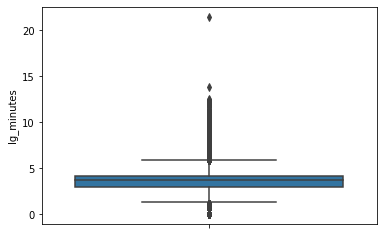

In [62]:
#Dropping outliers
sns.boxplot(data=df2, y='lg_minutes')


In [76]:
drop_minutes_outliers = df2[df2['lg_minutes']>9].index
drop_minutes_outliers

Int64Index([    50,     58,    317,    929,   1864,   2838,   3002,   3058,
              4384,   4425,
            ...
            216053, 217926, 219170, 219562, 220566, 221985, 223598, 227347,
            228147, 229274],
           dtype='int64', length=212)

In [77]:
df2.drop(drop_minutes_outliers, inplace=True)

/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_46515/1481075113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(drop_minutes_outliers, inplace=True)


<AxesSubplot:ylabel='n_steps'>

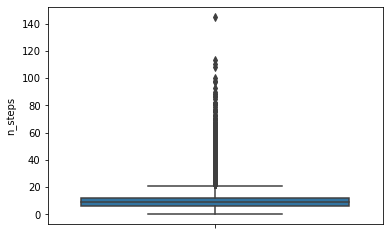

In [47]:
sns.boxplot(data=df2, y='n_steps')

In [52]:
drop_n_steps_outliers = df2[df2['n_steps']>100].index
drop_n_steps_outliers

Int64Index([1627, 51528, 51532], dtype='int64')

In [53]:
df2.drop(drop_n_steps_outliers, inplace=True)

/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_46515/1548833707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(drop_n_steps_outliers, inplace=True)


<AxesSubplot:ylabel='n_ingredients'>

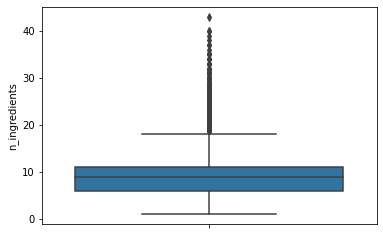

In [51]:
sns.boxplot(data=df2, y='n_ingredients')

In [54]:
drop_n_ingredients_outliers = df2[df2['n_ingredients']>40].index
drop_n_ingredients_outliers

Int64Index([2162], dtype='int64')

In [55]:
df2.drop(drop_n_ingredients_outliers, inplace=True)

/var/folders/5v/b37q3lz15lq75f7xfjzshd900000gn/T/ipykernel_46515/1249253514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(drop_n_ingredients_outliers, inplace=True)


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199964 entries, 0 to 231636
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            199964 non-null  object 
 1   id              199964 non-null  int64  
 2   minutes         199964 non-null  int64  
 3   contributor_id  199964 non-null  int64  
 4   tags            199964 non-null  object 
 5   nutrition       199964 non-null  object 
 6   n_steps         199964 non-null  int64  
 7   ingredients     199964 non-null  object 
 8   n_ingredients   199964 non-null  int64  
 9   lg_minutes      199964 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.8+ MB


In [ ]:
#check for duplicate rows

In [ ]:
def remove_outliers_iqr(column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Removing outliers from 'minutes', 'contributor_id', and 'n_steps' columns
columns_with_outliers = ['minutes', 'contributor_id', 'n_steps']
for column in columns_with_outliers:
    df_cleaned = remove_outliers_iqr(column)


NameError: name 'df_cleaned' is not defined

<Figure size 864x576 with 0 Axes>

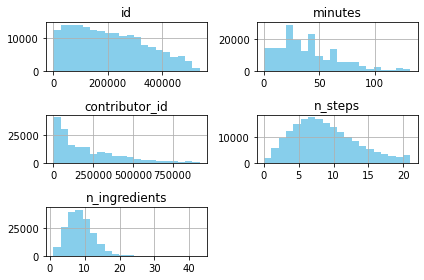

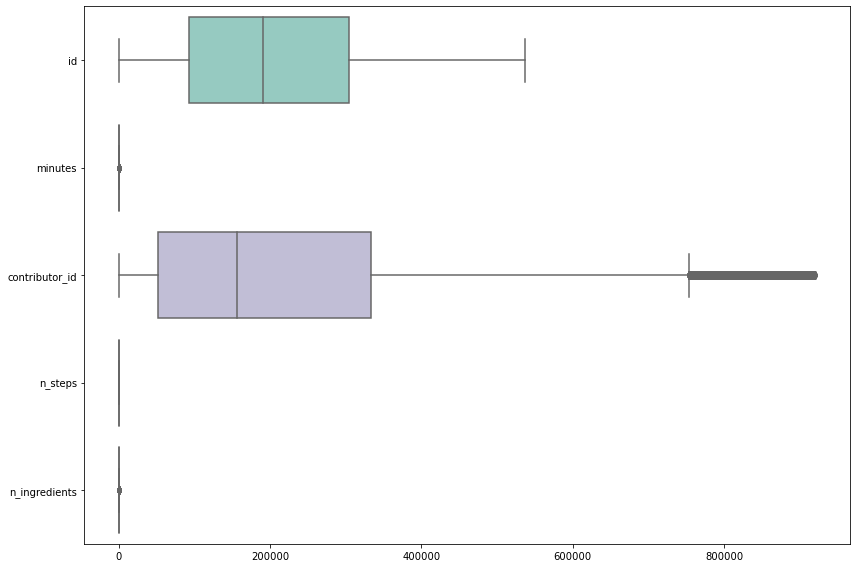

Descriptive Statistics:
                  id        minutes  contributor_id        n_steps  \
count  186000.000000  186000.000000   186000.000000  186000.000000   
mean   206101.296505      38.837231   224025.693731       8.846866   
std    133192.765778      26.653743   214950.857448       4.400160   
min        40.000000       0.000000       27.000000       0.000000   
25%     93121.750000      20.000000    52377.000000       6.000000   
50%    190510.000000      35.000000   156691.000000       8.000000   
75%    304530.000000      55.000000   333017.000000      12.000000   
max    537459.000000     132.000000   919690.000000      21.000000   

       n_ingredients  
count  186000.000000  
mean        8.780527  
std         3.529384  
min         1.000000  
25%         6.000000  
50%         8.000000  
75%        11.000000  
max        43.000000  

Correlation Matrix:
                      id   minutes  contributor_id   n_steps  n_ingredients
id              1.000000 -0.038564       

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is the cleaned DataFrame containing numerical columns

# 1. Descriptive Statistics
descriptive_stats = df_cleaned.describe()

# 2. Visualizations
# Histograms for numerical columns
plt.figure(figsize=(12, 8))
df_cleaned.hist(bins=20, color='skyblue')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, orient='h', palette='Set3')
plt.tight_layout()
plt.show()

# 3. Correlation by calculating the correlation coefficient
correlation_matrix = df_cleaned.corr()

# 4. Pearson's correlation coefficient for specific variables
# For example, if you want to calculate the Pearson's correlation between 'minutes' and 'n_steps':
variable1 = 'minutes'
variable2 = 'n_steps'
pearsons_corr = df_cleaned[variable1].corr(df_cleaned[variable2])

# Display the results
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print(f"\nPearson's correlation coefficient between '{variable1}' and '{variable2}': {pearsons_corr}")


In [ ]:
# Assuming 'df_cleaned' is the cleaned DataFrame containing numerical columns

# Function to calculate VIF scores
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF scores
vif_scores = calculate_vif(df_cleaned)

# Display VIF scores
print("Variance Inflation Factor (VIF) Scores:")
print(vif_scores)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming 'df_cleaned' is the cleaned DataFrame containing numerical columns

# For example, if you want to calculate the correlation and p-value between 'variable1' and 'variable2':
variable1 = 'minutes'
variable2 = 'n_steps'

# Calculate Pearson correlation coefficient and p-value
correlation_coef, p_value = pearsonr(df_cleaned[variable1], df_cleaned[variable2])

# Display the results
print(f"Pearson's correlation coefficient between '{variable1}' and '{variable2}': {correlation_coef}")
print(f"P-value: {p_value}")


Pearson's correlation coefficient between 'minutes' and 'n_steps': 0.3722142264670832
P-value: 0.0
